In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline
from sklearn.model_selection import train_test_split


In [81]:
# ! curl -O https://raw.githubusercontent.com/JunjieTsai/MLC2019_Project/master/0507%20Preprocessing4%20%26%20Modeling.ipynb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  327k  100  327k    0     0  2460k      0 --:--:-- --:--:-- --:--:-- 2460k


In [12]:
df = pd.read_csv('data/sale_training.csv', usecols = ['SALE PRICE','SALE DATE', 'histdist', 'landmark', 'landuse', 'YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum'])
print(df.shape)
df.head()

(8890, 61)


,SALE PRICE,SALE DATE,histdist,landmark,landuse,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,...,park_area,park_top_level,park_distance,FELONY,VIOLATION,MISDEMEANOR,Num of SAT Test Takers,satReadingSum,satMathSum,satWritingSum
0,3750000,2018-08-01 00:00:00,Mount Morris Park Historic District,NaN,2.0,110.0,3.0,0.0,3.0,2018.0,...,22.051,2.0,0.001133,462.0,195.0,869.0,3825.0,498.0,525.0,496.0
1,5000000,2018-10-25 00:00:00,NaN,NaN,4.0,119.0,26.0,4.0,30.0,5060.0,...,179.671,2.0,0.001841,306.0,156.0,677.0,4005.0,441.0,487.0,442.0
2,5000000,2018-10-25 00:00:00,NaN,NaN,4.0,119.0,26.0,4.0,30.0,5060.0,...,179.671,2.0,0.001792,303.0,156.0,672.0,4005.0,441.0,487.0,442.0
3,29100000,2018-10-22 00:00:00,NaN,NaN,4.0,99.0,26.0,1.0,27.0,4642.0,...,843.074,3.0,0.000745,509.0,266.0,897.0,3825.0,498.0,525.0,496.0
4,2350000,2019-02-11 00:00:00,Upper East Side Historic District,NaN,3.0,116.0,0.0,0.0,0.0,0.0,...,844.633,3.0,0.001081,102.0,21.0,83.0,9100.0,451.0,476.0,447.0


In [28]:
df = df.fillna(0)

# Train Test Split

In [29]:
y=df.loc[:,"SALE PRICE"]
X=df.loc[:,"landuse":"satWritingSum"]
# X=pd.get_dummies(X)

# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print (X_train.head())

      landuse  YEAR BUILT  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
5299      2.0       119.0                0.0               0.0          0.0   
1148      3.0        89.0                0.0               0.0          0.0   
4303      3.0        78.0                0.0               0.0          0.0   
2841      2.0        99.0                0.0               0.0          0.0   
4032      3.0        64.0                0.0               0.0          0.0   

      LAND SQUARE FEET  GROSS SQUARE FEET  easements  lotarea  bldgarea  \
5299               0.0                0.0        0.0   8180.0   25281.0   
1148               0.0                0.0        0.0  31000.0  196920.0   
4303               0.0                0.0        0.0  10067.0   62272.0   
2841               0.0                0.0        0.0   5021.0   19465.0   
4032               0.0                0.0        0.0  23246.0  319696.0   

          ...        park_area  park_top_level  park_distance  FELONY  \
5

# GridSearch CV with fillna(0) 

In [60]:
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
print (rs.best_params_)
print (rs.score(X_test, y_test))

/Users/zhengwenjie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 5}
0.01949756280464942


In [61]:
OS1=[]
param_grid = {'max_depth':range(1,11)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)    

for i in range(1,11):
    dt=DecisionTreeClassifier()
    rs = dt.fit(X_train,y_train)
    OS1.append(rs.score(X_test,y_test)) # or equivalently: OS.append(lm.score(X_test,y_test))
print (np.mean(OS1))
print (OS1)

0.022122234720659918
[0.02249718785151856, 0.021747281589801274, 0.022122234720659918, 0.022122234720659918, 0.022122234720659918, 0.022122234720659918, 0.022122234720659918, 0.022122234720659918, 0.021747281589801274, 0.02249718785151856]


# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print ('In sample accuracy:',dt.score(X_train,y_train))

# out of sample accuracy
print ('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 0.4235899084043066
Out of sample accuracy: 0.021747281589801274


# average OS Accuracy over 10 times

In [34]:
OS1=[]
param_grid = {'max_depth':range(1,11)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999)    

for i in range(1,11):
    dt=DecisionTreeClassifier()
    rs = dt.fit(X_train,y_train)
    OS1.append(rs.score(X_test,y_test)) # or equivalently: OS.append(lm.score(X_test,y_test))
print (np.mean(OS1))
print (OS1)

0.02230971128608924
[0.021747281589801274, 0.022122234720659918, 0.022122234720659918, 0.022122234720659918, 0.022872140982377203, 0.022872140982377203, 0.02249718785151856, 0.022122234720659918, 0.02249718785151856, 0.022122234720659918]


Populating the interactive namespace from numpy and matplotlib


/Users/zhengwenjie/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


0.019272590926134238
[0.01687289088863892, 0.019122609673790775, 0.014248218972628422, 0.016122984626921636, 0.018747656542932135, 0.01949756280464942, 0.01987251593550806, 0.021372328458942633, 0.023247094113235847, 0.023622047244094488]


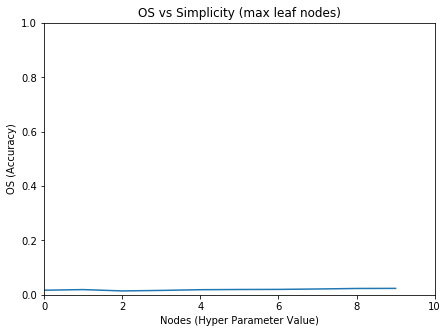

In [35]:
import matplotlib.pylab as plt
% pylab inline
OS1 = []

for i in range(1, 11):
    dt = DecisionTreeClassifier(max_leaf_nodes=i + 1)
    rs = dt.fit(X_train, y_train)
    # or equivalently: OS.append(lm.score(X_test,y_test))
    OS1.append(rs.score(X_test, y_test))
print(np.mean(OS1))
print(OS1)

plt.figure(figsize=(7, 5))
plt.plot(OS1)
plt.xlabel("Nodes (Hyper Parameter Value)")
plt.ylabel("OS (Accuracy)")
plt.title("OS vs Simplicity (max leaf nodes)")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()

# Param Search and OS 

In [63]:
param_grid = {'max_depth': range(1, 11)}
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999)
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid=param_grid)
rs = gs.fit(X_train, y_train)
# pred=rs.predict_proba(X_test)[:,1]
# print (rs.best_params_)
print(rs.score(X_test, y_test))

/Users/zhengwenjie/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.01949756280464942


In [68]:
from sklearn import tree

# just to keep it simple for visualization
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# your code here

thestring = tree.export_graphviz(dt, out_file=None,
                                 feature_names=X_train.columns.values,
                                 filled=True, rounded=True,
                                 special_characters=True, impurity=False).replace("<br/>", ", ").replace("&le;", "<=").replace("=<", "=\"").replace(">,", "\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="numbldgs <= 16.0, samples = 6223, value = [13, 2, 1 ... 1, 2, 1]", fillcolor="#39aee500"] ;
1 [label="numbldgs <= 12.0, samples = 6130, value = [13, 2, 1 ... 1, 2, 1]", fillcolor="#39aee501"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="numbldgs <= 9.0, samples = 6026, value = [13, 2, 1 ... 1, 2, 1]", fillcolor="#39aee501"] ;
1 -> 2 ;
3 [label="samples = 5590, value = [13, 2, 1 ... 1, 2, 1]", fillcolor="#39e58100"] ;
2 -> 3 ;
4 [label="samples = 436, value = [0, 0, 0 ... 0, 0, 0]", fillcolor="#39aee508"] ;
2 -> 4 ;
5 [label="distance_bus <= 0.002, samples = 104, value = [0, 0, 0 ... 0, 0, 0]", fillcolor="#39e5c81c"] ;
1 -> 5 ;
6 [label="samples = 100, value = [0, 0, 0 ... 0, 0, 0]", fillcolor="#39e5c81a"] ;
5 -> 6 ;
7 [label="samples = 4, value = [0, 0, 0 ... 0, 0, 0]", fillcolor="#39e5c855"] ;
5 -> 7 ;
8 [label="distance_subwa

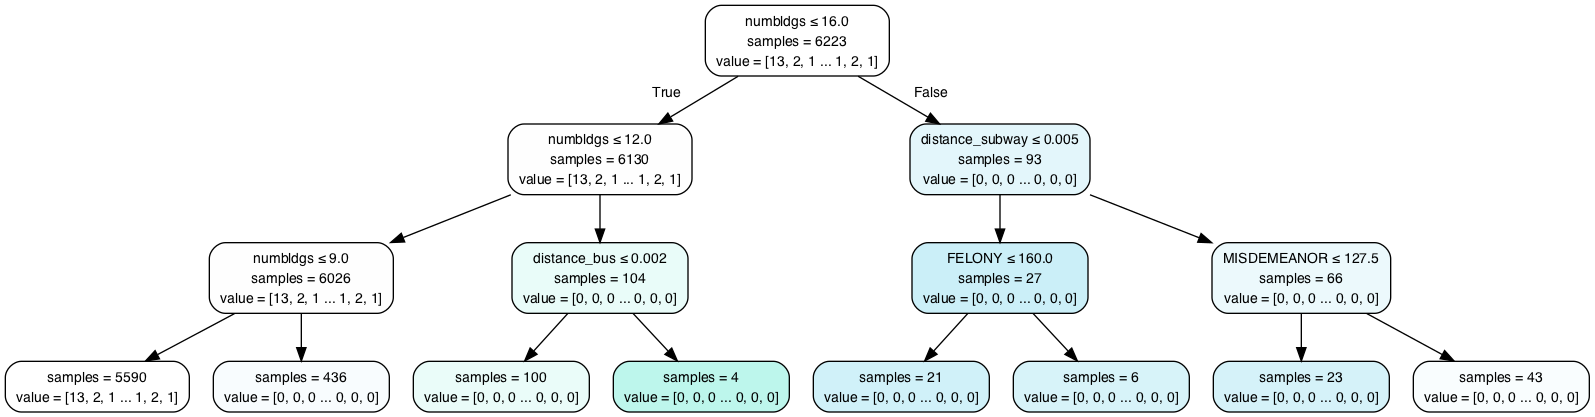

In [69]:
from sklearn import tree
from IPython.display import Image
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,
                                 feature_names=X_train.columns.values,
                                 filled=True, rounded=True,
                                 special_characters=True, impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)
Image(graph.create_png())

In [70]:
# class_names=['awful', 'low', 'medium', 'high'],

# Random Forest 

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(n_estimators=100, max_depth=5,
                             random_state=999)
clf.fit(X_train, y_train)


print(clf.feature_importances_)

# print(clf.predict([[0, 0, 0, 0]]))

[0.00515281 0.00960113 0.00352542 0.0015351  0.00233796 0.00081856
 0.0016498  0.00036533 0.03162716 0.03238254 0.01655751 0.0262077
 0.00178286 0.01561728 0.01328182 0.00099415 0.         0.00138254
 0.1227638  0.00520324 0.03426975 0.02477223 0.0374817  0.01234727
 0.02062012 0.02013489 0.01917339 0.01684933 0.03255858 0.03898671
 0.01489483 0.00182411 0.0055036  0.00424137 0.01416564 0.01191871
 0.01198324 0.02143111 0.0173335  0.03853157 0.00796775 0.01546002
 0.00870132 0.01137209 0.04353895 0.05220895 0.01274302 0.01485665
 0.00033137 0.03244755 0.03490424 0.03571994 0.02873525 0.00392543
 0.00276129 0.0014182  0.00109957]


In [79]:
clf.score(X_test, y_test)

0.02699662542182227